In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

In [3]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [4]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [5]:
cat=['Normal','vitiligo']

In [6]:
import pandas as pd
import os
def data_dictionary():
    path_train=r"C:\Users\teknoloji5\Downloads\skin\skin\train/"
    #list_train=os.listdir(path_train)
    cat=['Normal','vitiligo']
   #cat=['Normal','Melanoma Skin Cancer Nevi and Moles']
    #cat=['Normal','Eczema Photos']
    #cat=['Normal','Tinea Ringworm Candidiasis and other Fungal Infections']
    #cat=['Normal','Acne and Rosacea Photos']
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in cat:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [7]:
train=data_dictionary()

In [8]:
import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(100,100))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)

In [9]:
label=train['target']

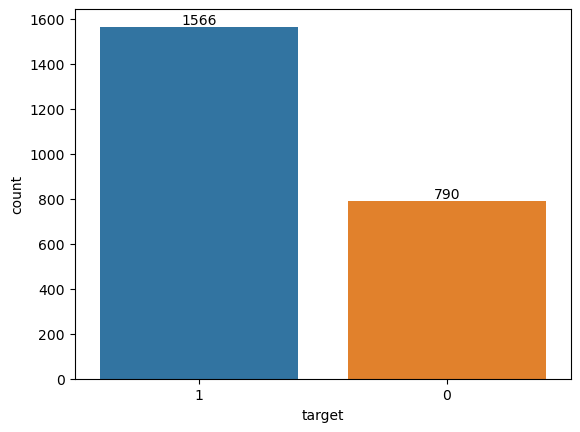

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)

ax = sns.countplot(x=train['target'],
                   order=train['target'].value_counts(ascending=False).index);

abs_values = train['target'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [11]:
len(label)

2356

In [12]:
len(images)

2356

In [13]:
import numpy as np
import pandas as pd

In [14]:
data=np.array(images)

In [15]:
label=np.array(label)

In [16]:
data.shape

(2356, 100, 100, 3)

In [17]:
label.shape

(2356,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=4)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)

In [19]:
X_train.shape

(1884, 100, 100, 3)

In [20]:
X_test.shape

(472, 100, 100, 3)

In [21]:
y_test.shape

(472,)

In [22]:
y_train.shape

(1884,)

In [23]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [24]:
base_model = ResNet50(weights = 'imagenet',  include_top = False, input_shape = (100, 100, 3)) 

In [26]:
import keras

In [29]:
x = base_model.output
x = BatchNormalization()(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
# Add a global average pooling layer to reduce the spatial dimensions of the features
x = GlobalAveragePooling2D()(x)
# Add a fully connected layer with 256 units and ReLU activation
predictions = Dense(1000, activation='relu')(x)
# Add the final classification layer with the number of classes in your dataset
#predictions = Dense(2, activation='softmax')(x)
model = keras.Model(inputs=base_model.input, outputs=predictions)

In [30]:
# let's make all layers non-trainable
for layer in base_model.layers : 
    layer.trainable = False

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 106, 106, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 50, 50, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [32]:
features_train=model.predict(X_train)

59/59 [==============================] - 26s 429ms/step


In [34]:
features_test=model.predict(X_test)

15/15 [==============================] - 6s 403ms/step


In [35]:
features_train.shape

(1884, 1000)

In [36]:
features_test.shape

(472, 1000)

In [37]:
num_train=X_train.shape[0]
num_test=X_test.shape[0]

In [38]:
x_test=features_test.reshape(num_test,-1)

In [39]:
x_test.shape

(472, 1000)

In [40]:
x_train=features_train.reshape(num_train,-1)

In [41]:
x_test.shape

(472, 1000)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components =500)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)


In [44]:
X_train.shape

(1884, 500)

In [45]:
pip install lazypredict

In [46]:
from lazypredict.Supervised import LazyClassifier
clf= LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train,X_test,y_train,y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [01:15<00:01,  1.32s/it]

[LightGBM] [Info] Number of positive: 1254, number of negative: 630
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127500
[LightGBM] [Info] Number of data points in the train set: 1884, number of used features: 500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.665605 -> initscore=0.688374
[LightGBM] [Info] Start training from score 0.688374


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:17<00:00,  2.66s/it]


In [47]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.95,0.94,0.94,0.95,1.59
XGBClassifier,0.95,0.94,0.94,0.95,2.89
NearestCentroid,0.94,0.93,0.93,0.94,0.09
LinearDiscriminantAnalysis,0.94,0.93,0.93,0.94,0.19
RidgeClassifier,0.94,0.93,0.93,0.94,0.07
RidgeClassifierCV,0.94,0.93,0.93,0.94,0.17
PassiveAggressiveClassifier,0.93,0.93,0.93,0.93,0.12
LinearSVC,0.93,0.93,0.93,0.93,0.57
CalibratedClassifierCV,0.94,0.92,0.92,0.94,7.63


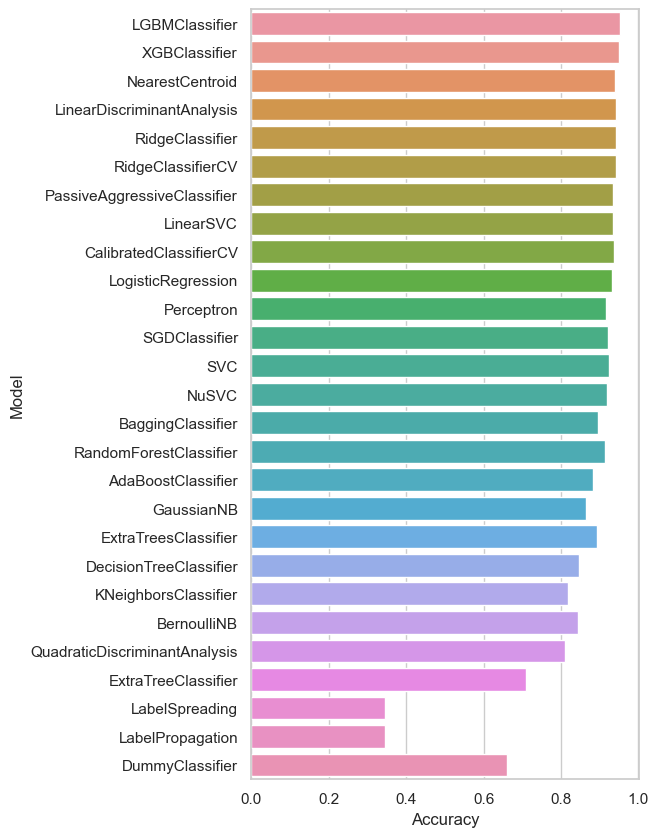

In [49]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)